In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. 데이터 확인

In [13]:
delivery_df = pd.read_csv('/jupyter/Data/Delivery/delivery_raw.csv', sep='\t')
delivery_df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [14]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [15]:
delivery_df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift                                   16262
total_busy                                      16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [16]:
delivery_df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


## 2. EDA & FE

### actual_delivery_time

In [17]:
time_nan = delivery_df[delivery_df['actual_delivery_time'].isnull()].index
delivery_df.drop(time_nan, axis=0, inplace=True)
delivery_df.reset_index(drop=True, inplace=True)
delivery_df['actual_delivery_time'].isnull().sum()

0

actual_delivery_time이 NULL값을 가지게 되면 target label이 없는것이나 다름이 없으므로 해당 데이터를 drop

In [18]:
# datetime 형식으로 변경
delivery_df['actual_delivery_time'] = pd.to_datetime(delivery_df['actual_delivery_time'])

### created_at

In [19]:
# datetime 형식으로 변경
delivery_df['created_at'] = pd.to_datetime(delivery_df['created_at'])

### delivery_time(target label)

In [20]:
delivery_df['delivery_time'] = delivery_df['actual_delivery_time'] - delivery_df['created_at']
delivery_df['delivery_time']

0        0 days 01:02:59
1        0 days 01:07:04
2        0 days 00:29:41
3        0 days 00:51:15
4        0 days 00:39:50
               ...      
197416   0 days 01:05:07
197417   0 days 00:56:23
197418   0 days 00:50:08
197419   0 days 01:05:07
197420   0 days 00:37:08
Name: delivery_time, Length: 197421, dtype: timedelta64[ns]

In [21]:
delivery_df['delivery_time'].dt.days.value_counts()

0     197418
98         1
3          1
4          1
Name: delivery_time, dtype: int64

In [22]:
# 이상치라고 판단되는 데이터를 제거

outlier_idx = delivery_df[
    (delivery_df['delivery_time'].dt.days==98) | 
    (delivery_df['delivery_time'].dt.days==3)  |
    (delivery_df['delivery_time'].dt.days==4)
].index
outlier_idx

Int64Index([2689, 27187, 185543], dtype='int64')

In [23]:
delivery_df.drop(outlier_idx, axis=0, inplace=True)
delivery_df.reset_index(drop=True, inplace=True)
delivery_df['delivery_time'].dt.days.value_counts()

0    197418
Name: delivery_time, dtype: int64

In [24]:
# target label을 초단위로 변경
def time_to_second(delivery_time):
    delivery_time = str(delivery_time)
    time = delivery_time.split(':')
    time[0] = time[0].split()[-1]
    result = int(time[0])*3600 + int(time[1])*60 + int(time[2])
    return result

delivery_df['delivery_time'] = delivery_df['delivery_time'].apply(time_to_second)
delivery_df['delivery_time']

0         3779
1         4024
2         1781
3         3075
4         2390
          ... 
197413    3907
197414    3383
197415    3008
197416    3907
197417    2228
Name: delivery_time, Length: 197418, dtype: int64

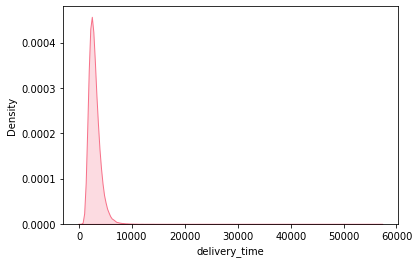

In [25]:
# target label 값 분포 확인
sns.set_palette("husl", 6)
sns.kdeplot(x='delivery_time', data=delivery_df, fill=True)
plt.show()

그래프가 왼쪽으로 조금 치우쳐 있으므로 로그 변환을 수행

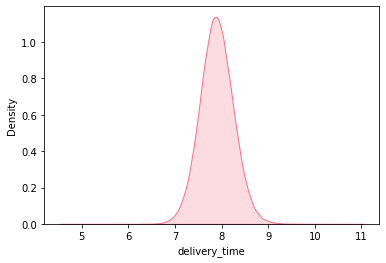

In [26]:
a = np.log(delivery_df['delivery_time'])
sns.kdeplot(a, fill=True)
plt.show()

### market_id

In [27]:
delivery_df['market_id'].isnull().sum()

987

987개의 NaN값을 확인할 수 있다.

**`store_id`로 `market_id`를 유추하는것이 가능하다.**

In [28]:
from collections import defaultdict
store_dic = defaultdict(set)

# store_id를 market_id 별로 딕셔너리에 분류
def cat_store_id(market, store):
    if np.isnan(market):
         return market
    store_dic[market].add(store)
    return market

In [29]:
delivery_df['market_id'] =  delivery_df.apply(lambda x: cat_store_id(x['market_id'], x['store_id']), axis=1)

In [30]:
market_col = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
for market in market_col:
    print(len(store_dic[market]))

2925
1939
2564
1818
1408
1310


In [31]:
delivery_df['store_id'].value_counts()

6865    937
1311    863
314     814
1686    765
3937    721
       ... 
1258      1
974       1
4260      1
6426      1
1845      1
Name: store_id, Length: 6743, dtype: int64

In [32]:
store_dic[1.0] -= (store_dic[2.0] | store_dic[3.0] | store_dic[4.0] | store_dic[5.0] | store_dic[6.0])
store_dic[2.0] -= (store_dic[1.0] | store_dic[3.0] | store_dic[4.0] | store_dic[5.0] | store_dic[6.0])
store_dic[3.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[4.0] | store_dic[5.0] | store_dic[6.0])
store_dic[4.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[3.0] | store_dic[5.0] | store_dic[6.0])
store_dic[5.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[3.0] | store_dic[4.0] | store_dic[6.0])
store_dic[6.0] -= (store_dic[1.0] | store_dic[2.0] | store_dic[3.0] | store_dic[4.0] | store_dic[5.0])

In [33]:
market_col = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
for market in market_col:
    print(len(store_dic[market]))

1243
415
1644
1003
1125
1310


In [34]:
def fillna(market, store):
    if np.isnan(market):
        market_col = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
        for i in market_col:
            if store in store_dic[i]:
                return i
        return market
    return market

In [35]:
delivery_df['market_id'] = delivery_df.apply(lambda x: fillna(x['market_id'], x['store_id']), axis=1)

In [36]:
delivery_df['market_id'].isnull().sum()

3

987개의 NaN값을 3개를 제외하고 전부 채워주었다.

In [37]:
delivery_df[delivery_df['market_id'].isnull()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
120917,NaN,2015-02-08 03:39:46,2015-02-08 04:25:31,3258,NaN,NaN,3,3470,3,725,1795,NaN,NaN,NaN,446,395.0,2745
152843,NaN,2015-02-08 23:43:19,2015-02-09 00:33:20,4122,pizza,NaN,2,3400,2,1000,1400,3.0,3.0,3.0,446,586.0,3001
186144,NaN,2015-02-15 23:53:45,2015-02-16 00:25:42,5774,sandwich,NaN,3,1550,2,250,900,14.0,14.0,18.0,446,261.0,1917


In [38]:
delivery_df[(delivery_df['store_id']==3258) | (delivery_df['store_id']==4122) | (delivery_df['store_id']==5774)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
120917,NaN,2015-02-08 03:39:46,2015-02-08 04:25:31,3258,NaN,NaN,3,3470,3,725,1795,NaN,NaN,NaN,446,395.0,2745
152843,NaN,2015-02-08 23:43:19,2015-02-09 00:33:20,4122,pizza,NaN,2,3400,2,1000,1400,3.0,3.0,3.0,446,586.0,3001
186144,NaN,2015-02-15 23:53:45,2015-02-16 00:25:42,5774,sandwich,NaN,3,1550,2,250,900,14.0,14.0,18.0,446,261.0,1917


In [39]:
market_id_nan = delivery_df[delivery_df['market_id'].isnull()].index
delivery_df.drop(market_id_nan, axis=0, inplace=True)
delivery_df.reset_index(drop=True, inplace=True)

In [40]:
delivery_df['market_id'].isnull().sum()

0

### order protocol

In [41]:
delivery_df['order_protocol'].isnull().sum()

992

In [42]:
delivery_df['order_protocol'].value_counts()

1.0    54722
3.0    53196
5.0    44288
2.0    24051
4.0    19353
6.0      794
7.0       19
Name: order_protocol, dtype: int64

In [43]:
def fillna_order_protocol(store_id, order_protocol):
    if np.isnan(order_protocol):
        return delivery_df[delivery_df['store_id'] == store_id]['order_protocol'].value_counts().sort_values(ascending=False).index[0]
    else:
        return order_protocol

In [44]:
delivery_df['order_protocol'] = delivery_df.apply(lambda x: fillna_order_protocol(x['store_id'], x['order_protocol']), axis=1)

In [45]:
delivery_df['order_protocol'].isnull().sum()

0

### total_items

<AxesSubplot:xlabel='total_items', ylabel='Density'>

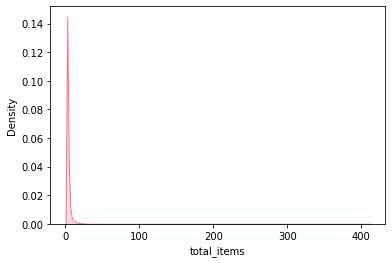

In [46]:
sns.kdeplot(x='total_items', data=delivery_df, fill=True)

In [36]:
delivery_df['total_items'].describe()

count    197415.000000
mean          3.196383
std           2.666585
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64

<AxesSubplot:xlabel='total_items', ylabel='subtotal'>

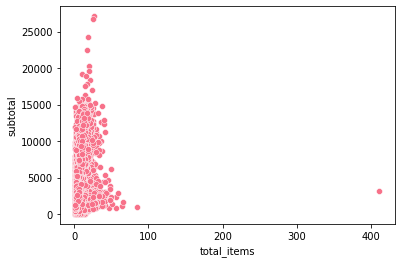

In [37]:
sns.scatterplot(x='total_items',y='subtotal',data=delivery_df)

이상치라고 판단되는 값을 제거한다.

In [47]:
outlier_idx = delivery_df[delivery_df['total_items'] == 411].index

In [48]:
delivery_df.drop(outlier_idx, axis=0, inplace=True)

<AxesSubplot:xlabel='total_items', ylabel='Density'>

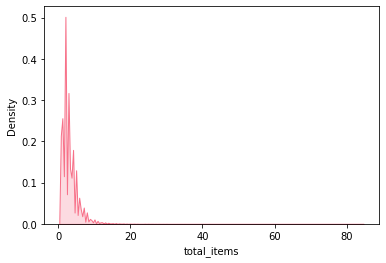

In [49]:
sns.kdeplot(x='total_items', data=delivery_df, fill=True)

### subtotal

<AxesSubplot:xlabel='subtotal', ylabel='Density'>

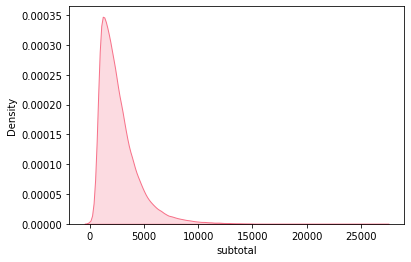

In [41]:
sns.kdeplot(x='subtotal', data=delivery_df, fill=True)

### num_distinct_items

<AxesSubplot:>

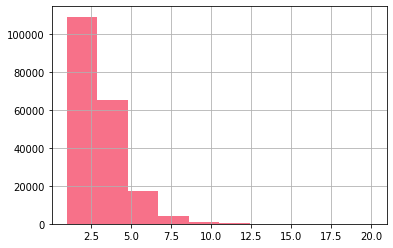

In [42]:
delivery_df['num_distinct_items'].hist()

### item_price

<AxesSubplot:>

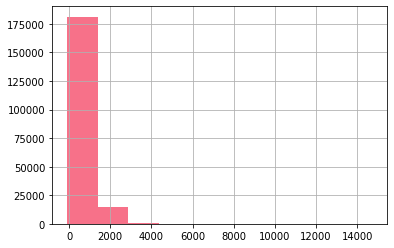

In [43]:
delivery_df['min_item_price'].hist()

<AxesSubplot:>

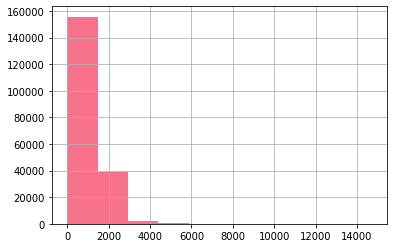

In [44]:
delivery_df['max_item_price'].hist()

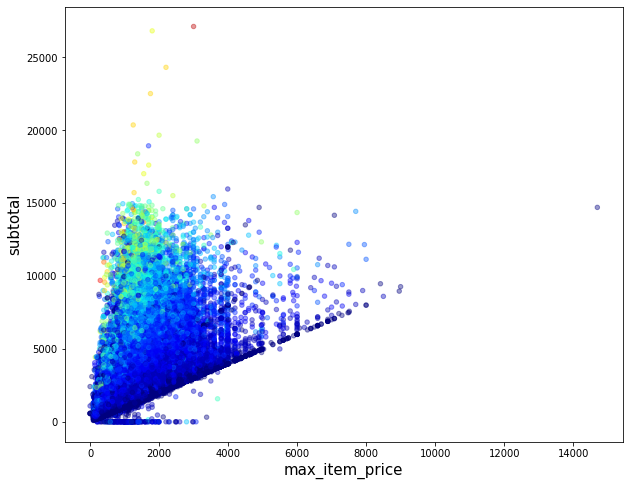

In [45]:
delivery_df.plot(kind='scatter', x='max_item_price', y='subtotal', alpha=0.4, figsize=(10,8), c='num_distinct_items', cmap=plt.get_cmap("jet"), colorbar=False)
plt.xlabel('max_item_price', size=15)
plt.ylabel('subtotal', size=15)
plt.show()

In [46]:
delivery_df[delivery_df['max_item_price'] > delivery_df['subtotal']]['total_items'].value_counts()

1     324
2     107
3      49
4      27
5      16
7       5
6       4
9       3
8       3
14      1
15      1
13      1
11      1
Name: total_items, dtype: int64

전체 가격이 주문에 포함된 아이템 중 가장 비싼 아이템의 가격보다 낮은 데이터들을 확인할 수 있다.  

### weekday

In [50]:
import datetime
def weekday(date):
    wd = pd.Timestamp(date)
    return wd.dayofweek

In [51]:
delivery_df['weekday'] = delivery_df['created_at'].apply(weekday)
delivery_df[['created_at', 'weekday']]

,created_at,weekday
0,2015-02-06 22:24:17,4
1,2015-02-10 21:49:25,1
2,2015-01-22 20:39:28,3
3,2015-02-03 21:21:45,1
4,2015-02-15 02:40:36,6
...,...,...
197410,2015-02-17 00:19:41,1
197411,2015-02-13 00:01:59,4
197412,2015-01-24 04:46:08,5
197413,2015-02-01 18:18:15,6


### is_weekend

In [52]:
def is_weekend(weekday):
    if weekday in [5,6]:
        return 1
    else:
        return 0

In [53]:
delivery_df['is_weekend'] = delivery_df['weekday'].apply(is_weekend)

### is_holiday

In [54]:
def date_split(date):
    year = str(date.year)
    month = str(date.month)
    if len(month)<2:
        month = '0'+month
    day = str(date.day)
    if len(day)<2:
        day = '0'+day
    return year+'-'+month+'-'+day
delivery_df['date'] = delivery_df['created_at'].apply(date_split)
delivery_df['date']

0         2015-02-06
1         2015-02-10
2         2015-01-22
3         2015-02-03
4         2015-02-15
             ...    
197410    2015-02-17
197411    2015-02-13
197412    2015-01-24
197413    2015-02-01
197414    2015-02-08
Name: date, Length: 197414, dtype: object

In [55]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=delivery_df.date.min(), end=delivery_df.date.max())
delivery_df['date'] = pd.to_datetime(delivery_df['date'])
delivery_df['is_holiday'] = delivery_df['date'].isin(holidays)
print('holiday_list:', holidays)
print('mean deilvery_time at holiday: {0:.2f}'.format(delivery_df[delivery_df['date'] == '2015-02-16']['delivery_time'].mean()))
print('mean delivery_time: {0:.2f}'.format(delivery_df['delivery_time'].mean()))

holiday_list: DatetimeIndex(['2015-02-16'], dtype='datetime64[ns]', freq=None)
mean deilvery_time at holiday: 3153.84
mean delivery_time: 2861.59


### month & day

In [56]:
delivery_df['date'].min(), delivery_df['date'].max()

(Timestamp('2015-01-21 00:00:00'), Timestamp('2015-02-18 00:00:00'))

In [57]:
delivery_df['month'] = delivery_df['date'].dt.month
delivery_df['day'] = delivery_df['date'].dt.day

### hour

In [58]:
delivery_df['hour'] = delivery_df['created_at'].dt.hour + (delivery_df['created_at'].dt.minute)/60 + (delivery_df['created_at'].dt.second)/3600
delivery_df[['hour', 'created_at']].head()

,hour,created_at
0,22.404722,2015-02-06 22:24:17
1,21.823611,2015-02-10 21:49:25
2,20.657778,2015-01-22 20:39:28
3,21.362500,2015-02-03 21:21:45
4,2.676667,2015-02-15 02:40:36


### estimated_store_to_consumer_driving_duration

In [59]:
delivery_df['estimated_store_to_consumer_driving_duration'].isnull().sum()

526

In [60]:
delivery_df['estimated_time'] = delivery_df['estimated_store_to_consumer_driving_duration']
delivery_df.drop('estimated_store_to_consumer_driving_duration', axis=1, inplace=True)

<AxesSubplot:xlabel='estimated_time', ylabel='delivery_time'>

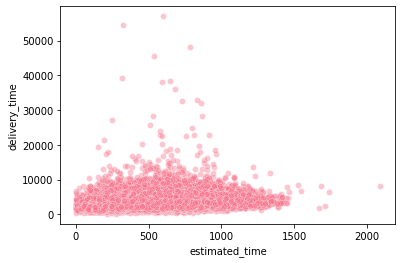

In [61]:
sns.scatterplot(y=delivery_df['delivery_time'], x=delivery_df['estimated_time'], alpha=0.4)

In [63]:
from sklearn.linear_model import LinearRegression

delivery_time_df = pd.DataFrame()
delivery_time_df['delivery_time'] = delivery_df.loc[:,'delivery_time']
delivery_time_df['estimated_time'] = delivery_df.loc[:, 'estimated_time']

train = delivery_time_df[~delivery_time_df['estimated_time'].isnull()]
test = delivery_time_df[delivery_time_df['estimated_time'].isnull()]

lr = LinearRegression()
lr.fit(train[['delivery_time']], train[['estimated_time']])
prediction = lr.predict(test[['delivery_time']])

In [65]:
delivery_df['estimated_time'].mean()

545.3588537645768

In [66]:
counter=-1

def fillna_estimated_time(estimated_time):
    if np.isnan(estimated_time):
        global counter
        counter+=1
        return prediction[counter]
    else:
        return estimated_time

delivery_df['estimated_time'] = delivery_df['estimated_time'].apply(fillna_estimated_time)
delivery_df['estimated_time'].isnull().sum()

0

<AxesSubplot:>

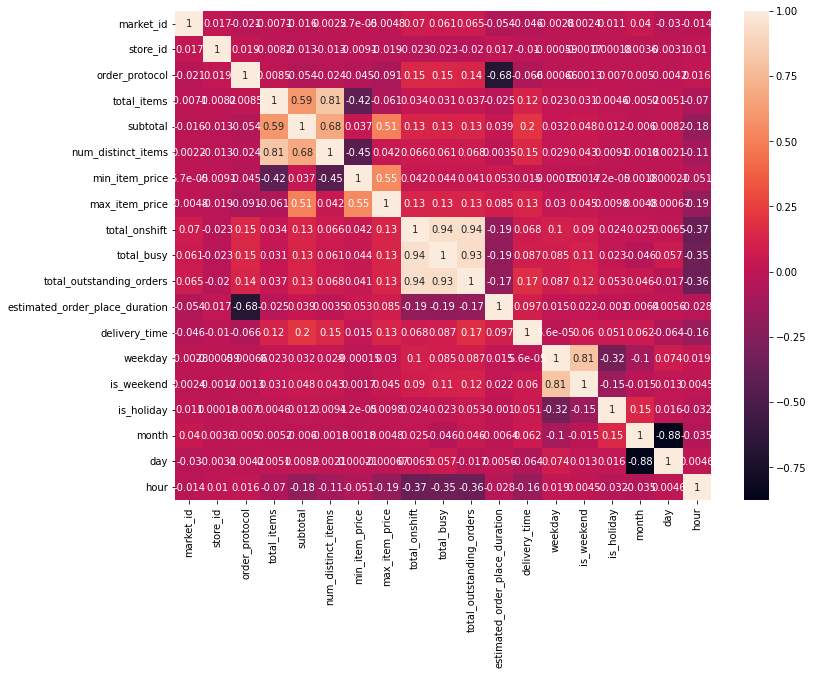

In [67]:
plt.figure(figsize=(12,9))
sns.heatmap(delivery_df.corr(), annot=True)

### store_primary_category

In [68]:
delivery_df['store_primary_category'].isnull().sum()

4759

In [69]:
store_category_dic = defaultdict(list)

def cat_store(store_id, store_primary_category):
    if type(store_primary_category) == float:
        return store_primary_category
    else:
        store_category_dic[store_id].append(store_primary_category)
        return store_primary_category

In [70]:
delivery_df['store_primary_category'] = delivery_df.apply(lambda x: cat_store(x['store_id'], x['store_primary_category']), axis=1)

In [71]:
for store_id in store_category_dic:
    temp = defaultdict(int)
    maximum = ['default',0]
    for category in store_category_dic[store_id]:
        temp[category]+=1
        if temp[category] > maximum[1]:
            maximum = [category, temp[category]]
    store_category_dic[store_id] = maximum[0]

In [72]:
def fillna_store_primary_category(store_id, store_primary_category):
    if type(store_primary_category) == float:
        if store_category_dic[store_id]:
            return store_category_dic[store_id]
    return store_primary_category

In [73]:
delivery_df['store_primary_category'] = delivery_df.apply(lambda x: fillna_store_primary_category(x['store_id'], x['store_primary_category']), axis=1)

In [74]:
store_cat_null_idx = delivery_df[delivery_df['store_primary_category'].isnull()].index
delivery_df[delivery_df['store_primary_category'].isnull()].head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,estimated_order_place_duration,delivery_time,weekday,is_weekend,date,is_holiday,month,day,hour,estimated_time
317,3.0,2015-01-23 19:22:18,2015-01-23 19:48:50,3879,NaN,4.0,3,582,1,194,...,251,1592,4,0,2015-01-23,False,1,23,19.371667,245.0
318,3.0,2015-02-01 17:26:45,2015-02-01 18:24:13,3879,NaN,4.0,5,980,2,194,...,251,3448,6,1,2015-02-01,False,2,1,17.445833,344.0
1282,3.0,2015-02-07 03:02:56,2015-02-07 03:55:30,3469,NaN,4.0,4,1246,2,194,...,251,3154,5,1,2015-02-07,False,2,7,3.048889,182.0
1597,3.0,2015-02-02 00:34:04,2015-02-02 01:21:03,5550,NaN,1.0,1,1799,1,1799,...,446,2819,0,0,2015-02-02,False,2,2,0.567778,697.0
1598,3.0,2015-02-13 21:05:28,2015-02-13 21:36:56,5550,NaN,1.0,1,999,1,999,...,446,1888,4,0,2015-02-13,False,2,13,21.091111,834.0


In [75]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
delivery_df['store_cat'] = encoder.fit_transform(delivery_df['store_primary_category'])
delivery_df.iloc[store_cat_null_idx][['store_cat', 'store_primary_category']].head()

,store_cat,store_primary_category
317,74,NaN
318,74,NaN
1282,74,NaN
1597,74,NaN
1598,74,NaN


NaN값이 74로 분류됨을 확인

In [76]:
from sklearn.ensemble import RandomForestClassifier

train_store_cat = delivery_df[delivery_df['store_cat']!=74]
test_store_cat = delivery_df[delivery_df['store_cat']==74]

drop_cols = ['store_cat', 'created_at', 'actual_delivery_time', 'store_primary_category', 'date', 'total_onshift', 'total_busy', 'total_outstanding_orders']
train_data = train_store_cat.drop(drop_cols, axis=1)
target = train_store_cat['store_cat']
test_data = test_store_cat.drop(drop_cols, axis=1)

rf = RandomForestClassifier(n_jobs=1)
rf.fit(train_data, target)

RandomForestClassifier(n_jobs=1)

In [77]:
prediction = rf.predict(test_data)
counter = -1
def fillna_store_cat(store_cat):
    if store_cat == 74:
        global counter
        counter+=1
        return prediction[counter]
    else:
        return store_cat

In [78]:
delivery_df['store_cat'] = delivery_df['store_cat'].apply(fillna_store_cat)
delivery_df.drop('store_primary_category', axis=1, inplace=True)
delivery_df[delivery_df['store_cat']==74]

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,delivery_time,weekday,is_weekend,date,is_holiday,month,day,hour,estimated_time,store_cat


In [79]:
delivery_df.to_csv('delivery_df.csv')

In [11]:
delivery_df = pd.read_csv('delivery_df.csv')
delivery_df.drop('Unnamed: 0', axis=1, inplace=True)
sns.set_palette("husl", 6)
delivery_df.head(3)

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,delivery_time,weekday,is_weekend,date,is_holiday,month,day,hour,estimated_time,store_cat
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,1.0,4,3441,4,557,1239,...,3779,4,0,2015-02-06 00:00:00,False,2,6,22.404722,861.0,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,2.0,1,1900,1,1400,1400,...,4024,1,0,2015-02-10 00:00:00,False,2,10,21.823611,690.0,47
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1,1900,1,1900,1900,...,1781,3,0,2015-01-22 00:00:00,False,1,22,20.657778,690.0,47


### total_onshift & total_busy & total_outstanding_orders

In [12]:
delivery_df[delivery_df['total_onshift'].isnull()][['total_onshift', 'total_busy',  'total_outstanding_orders']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16260 entries, 159 to 197407
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_onshift             0 non-null      float64
 1   total_busy                0 non-null      float64
 2   total_outstanding_orders  0 non-null      float64
dtypes: float64(3)
memory usage: 508.1 KB


<AxesSubplot:>

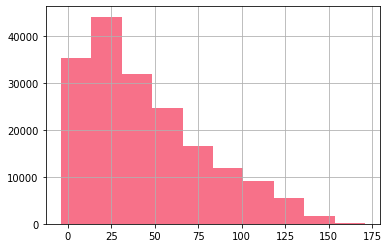

In [13]:
delivery_df['total_onshift'].hist()

<AxesSubplot:>

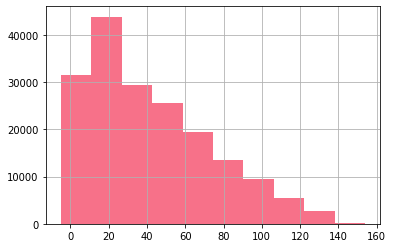

In [14]:
delivery_df['total_busy'].hist()

<AxesSubplot:>

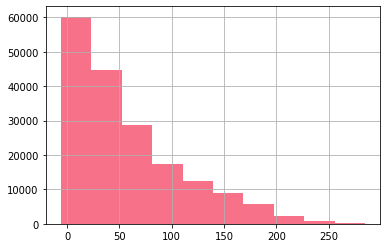

In [15]:
delivery_df['total_outstanding_orders'].hist()

In [16]:
def fix_estimated_time(estimated_time):
    if estimated_time[0] == '[':
        return estimated_time[1:-1]
    else:
        return estimated_time

delivery_df['estimated_time'] = delivery_df['estimated_time'].apply(fix_estimated_time)
delivery_df['estimated_time'] = delivery_df['estimated_time'].astype(float)

In [17]:
delivery_df['estimated_time'].mean()

545.3373856275301

In [19]:
from sklearn.ensemble import RandomForestRegressor

drop_cols = ['created_at', 'actual_delivery_time', 'date', 'total_onshift', 'total_busy', 'total_outstanding_orders']
train = delivery_df[~delivery_df['total_onshift'].isnull()]
test = delivery_df[delivery_df['total_onshift'].isnull()]
target = train[['total_onshift', 'total_busy', 'total_outstanding_orders']]
train_data = train.drop(drop_cols, axis=1)
test_data = test.drop(drop_cols, axis=1)

In [20]:
rf = RandomForestRegressor()
rf.fit(train_data, target)

RandomForestRegressor()

In [21]:
prediction = rf.predict(test_data)
prediction

array([[ 45.31,  36.59,  44.29],
       [ 87.81,  77.66, 125.15],
       [ 23.98,  22.57,  22.66],
       ...,
       [ 26.3 ,  22.93,  26.68],
       [ 38.45,  36.3 ,  45.59],
       [ 30.61,  31.05,  41.84]])

In [22]:
counter=-1
def fillna_total_onshift(total_onshift):
    if np.isnan(total_onshift):
        global counter
        counter+=1
        return prediction[counter][0]
    else:
        return total_onshift

In [23]:
delivery_df['total_onshift']= delivery_df['total_onshift'].apply(fillna_total_onshift)
delivery_df['total_onshift'].isnull().sum()

0

In [24]:
counter=-1
def fillna_total_busy(total_busy):
    if np.isnan(total_busy):
        global counter
        counter+=1
        return prediction[counter][1]
    else:
        return total_busy

In [25]:
delivery_df['total_busy']= delivery_df['total_busy'].apply(fillna_total_busy)
delivery_df['total_busy'].isnull().sum()

0

In [26]:
counter=-1
def fillna_total_outstanding_orders(total_outstanding_orders):
    if np.isnan(total_outstanding_orders):
        global counter
        counter+=1
        return prediction[counter][2]
    else:
        return total_outstanding_orders

In [27]:
delivery_df['total_outstanding_orders']= delivery_df['total_outstanding_orders'].apply(fillna_total_outstanding_orders)
delivery_df['total_outstanding_orders'].isnull().sum()

0

In [28]:
delivery_df.to_csv('delivery_df.csv')

In [2]:
delivery_df = pd.read_csv('delivery_df.csv')
delivery_df.drop('Unnamed: 0', axis=1, inplace=True)
delivery_df.head(3)

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,delivery_time,weekday,is_weekend,date,is_holiday,month,day,hour,estimated_time,store_cat
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,1.0,4,3441,4,557,1239,...,3779,4,0,2015-02-06 00:00:00,False,2,6,22.404722,861.0,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,2.0,1,1900,1,1400,1400,...,4024,1,0,2015-02-10 00:00:00,False,2,10,21.823611,690.0,47
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1,1900,1,1900,1900,...,1781,3,0,2015-01-22 00:00:00,False,1,22,20.657778,690.0,47


## 3. Data split

In [6]:
drop_col = ['created_at', 'actual_delivery_time', 'estimated_order_place_duration', 'date']
new_delivery_df = delivery_df.drop(drop_col, axis=1)

new_delivery_df.head(3)

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,delivery_time,weekday,is_weekend,is_holiday,month,day,hour,estimated_time,store_cat
0,1.0,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,3779,4,0,False,2,6,22.404722,861.0,4
1,2.0,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,4024,1,0,False,2,10,21.823611,690.0,47
2,3.0,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,1781,3,0,False,1,22,20.657778,690.0,47


In [206]:
from sklearn.model_selection import train_test_split


X = new_delivery_df.drop('delivery_time', axis=1)
Y = new_delivery_df['delivery_time']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
Y_train = np.log(Y_train)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((177672, 19), (19742, 19), (177672,), (19742,))

## 4. Model

In [207]:
# under 비율 출력 함수
def under_ratio(Y_test, prediction):
    under_count = 0
    total = Y_test.shape[0]
    for ans, pred in zip(Y_test, prediction):
        if pred<ans:
            under_count+=1
    return np.round((under_count/total), 3)

### XGBoost

In [218]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth=7, random_state=0)
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [219]:
prediction = xgb.predict(X_test)
prediction = np.exp(prediction)

In [220]:
from sklearn.metrics import mean_squared_error

prediction+=300
RMSE = np.sqrt(mean_squared_error(Y_test, prediction))
RMSE

982.648427622762

In [221]:
under_ratio(Y_test, prediction)

0.329

### RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [38]:
prediction = rf.predict(X_test)
prediction = np.exp(prediction)
RMSE = np.sqrt(mean_squared_error(Y_test, prediction))
RMSE

1019.66361037281

In [39]:
under_ratio(Y_test, prediction)

0.407

### LGBM

In [229]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(learning_rate=0.4, random_state=42)
lgbm.fit(X_train, Y_train)

LGBMRegressor(learning_rate=0.4, random_state=42)

In [230]:
prediction = lgbm.predict(X_test)
prediction = np.exp(prediction)
prediction+=300
RMSE = np.sqrt(mean_squared_error(Y_test, prediction))
RMSE

989.4103806921191

In [231]:
under_ratio(Y_test, prediction)

0.33

### GradientBoost

In [192]:
gb = GradientBoostingRegressor(learning_rate=0.01, random_state=42)
gb.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, random_state=42)

In [193]:
prediction = gb.predict(X_test)
prediction = np.exp(prediction)
RMSE = np.sqrt(mean_squared_error(Y_test, prediction))
RMSE

1122.7114074118892

In [194]:
under_ratio(Y_test, prediction)

0.415